In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, classification_report,roc_curve, auc, roc_auc_score
from sklearn.svm import SVC

1.  existing_checking: Tình trạng tài khoản ngân hàng thường dùng.
2.  duration_month: Thời gian trả nợ (tháng).
3.  credit_history: Lịch sử tín dụng.
4.  purpose: Mục đích vay tiền.
5.  credit_amount: Số tiền vay.
6.  savings: Tài khoản tiết kiệm.
7.  employment: Tình trạng việc làm.
8.  installment_rate: Tỷ lệ trả góp hàng tháng.
9.  personal_status: Tình trạng cá nhân.
10. other_parties: Người tham gia khác trong hợp đồng.
11. residence_since: Thời gian ở chỗ ở hiện tại (năm).
12. property_magnitude: Mức độ tài sản sở hữu.
13. cc_age: Tuổi của khách hàng.
14. other_payment_plans: Kế hoạch thanh toán khác.
15. housing: Tình trạng nhà ở.
16. existing_credits: Số lượng tín dụng hiện tại.
17. job: Nghề nghiệp.
18. num_dependents: Số người phụ thuộc.
19. own_telephone: Có sở hữu điện thoại hay không.
20. foreign_worker: Là công nhân nước ngoài hay không.
21. class: Biến dự đoán, cho biết khả năng trả nợ của khách hàng (Good hoặc Bad).

In [14]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = ["existing_checking", "duration_month", "credit_history", "purpose", "credit_amount", "savings", "employment", "installment_rate", "personal_status", "other_parties", "residence_since", "property_magnitude", "cc_age", "other_payment_plans", "housing", "existing_credits", "job", "num_dependents", "own_telephone", "foreign_worker", "class"]
data = pd.read_csv(url, sep=' ', header=None, names=column_names)
data.to_csv('/content/drive/MyDrive/DoanML/german.csv', index = False)
data.sample(5)

,existing_checking,duration_month,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
183,A14,24,A34,A42,3777,A64,A73,4,A93,A101,...,A121,50,A143,A152,1,A173,1,A192,A201,1
194,A12,45,A32,A43,3031,A62,A73,4,A93,A103,...,A122,21,A143,A151,1,A173,1,A191,A201,2
578,A12,36,A34,A40,2820,A61,A72,4,A91,A101,...,A123,27,A143,A152,2,A173,1,A191,A201,2
517,A14,36,A34,A42,7127,A61,A72,2,A92,A101,...,A122,23,A143,A151,2,A173,1,A192,A201,2
133,A14,18,A32,A42,1984,A61,A73,4,A93,A101,...,A124,47,A141,A153,2,A173,1,A191,A201,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   existing_checking    1000 non-null   object
 1   duration_month       1000 non-null   int64 
 2   credit_history       1000 non-null   object
 3   purpose              1000 non-null   object
 4   credit_amount        1000 non-null   int64 
 5   savings              1000 non-null   object
 6   employment           1000 non-null   object
 7   installment_rate     1000 non-null   int64 
 8   personal_status      1000 non-null   object
 9   other_parties        1000 non-null   object
 10  residence_since      1000 non-null   int64 
 11  property_magnitude   1000 non-null   object
 12  cc_age               1000 non-null   int64 
 13  other_payment_plans  1000 non-null   object
 14  housing              1000 non-null   object
 15  existing_credits     1000 non-null   int64 
 16  job    

In [16]:
data.describe()

,duration_month,credit_amount,installment_rate,residence_since,cc_age,existing_credits,num_dependents,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [17]:
data.isnull().sum()

existing_checking      0
duration_month         0
credit_history         0
purpose                0
credit_amount          0
savings                0
employment             0
installment_rate       0
personal_status        0
other_parties          0
residence_since        0
property_magnitude     0
cc_age                 0
other_payment_plans    0
housing                0
existing_credits       0
job                    0
num_dependents         0
own_telephone          0
foreign_worker         0
class                  0
dtype: int64

In [18]:
data.columns

Index(['existing_checking', 'duration_month', 'credit_history', 'purpose',
       'credit_amount', 'savings', 'employment', 'installment_rate',
       'personal_status', 'other_parties', 'residence_since',
       'property_magnitude', 'cc_age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [19]:
for column in data.columns:
  print(f'{column}, {len(data[column].unique())} : {data[column].unique()} ')

existing_checking, 4 : ['A11' 'A12' 'A14' 'A13'] 
duration_month, 33 : [ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40] 
credit_history, 5 : ['A34' 'A32' 'A33' 'A30' 'A31'] 
purpose, 10 : ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48'] 
credit_amount, 921 : [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6078  7721  1410
  1449   392  626

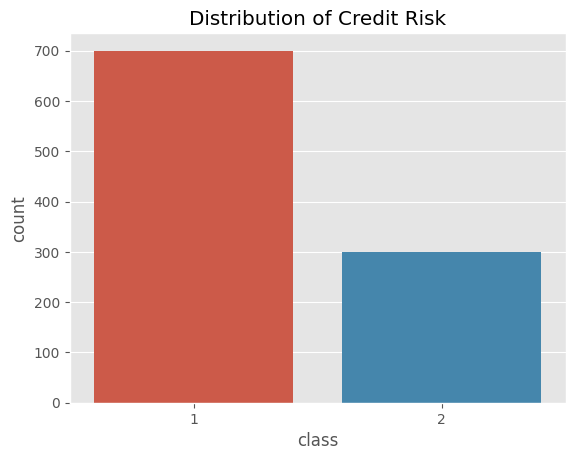

In [20]:
sns.countplot(data=data, x='class')
plt.title('Distribution of Credit Risk')
plt.savefig('/content/drive/MyDrive/DoanML/anh1.png')
plt.show()

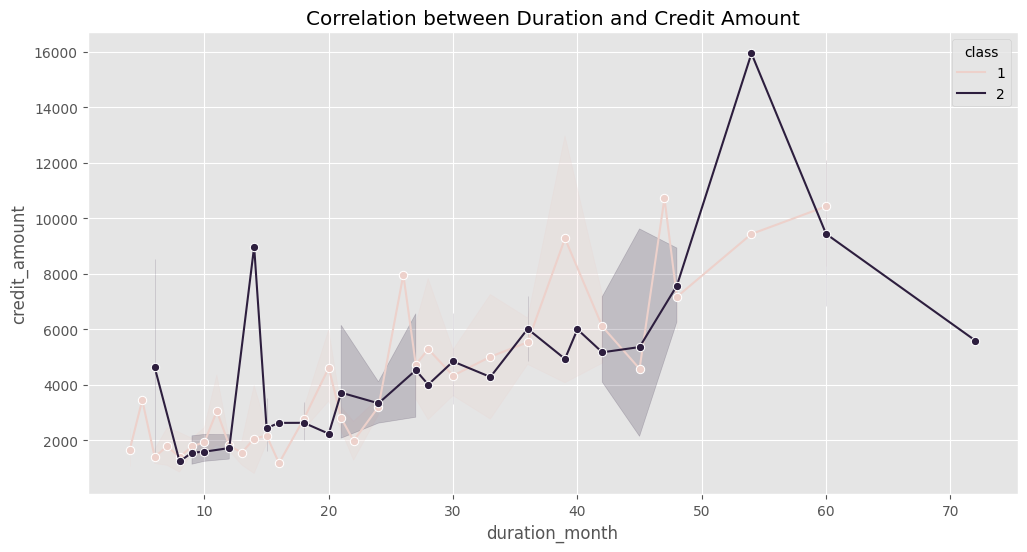

In [21]:
plt.figure(figsize = (12,6))
sns.lineplot(data=data, x='duration_month', y='credit_amount', marker = 'o', hue = 'class')
plt.title('Correlation between Duration and Credit Amount')
plt.savefig('/content/drive/MyDrive/DoanML/anh2.png')
plt.show()

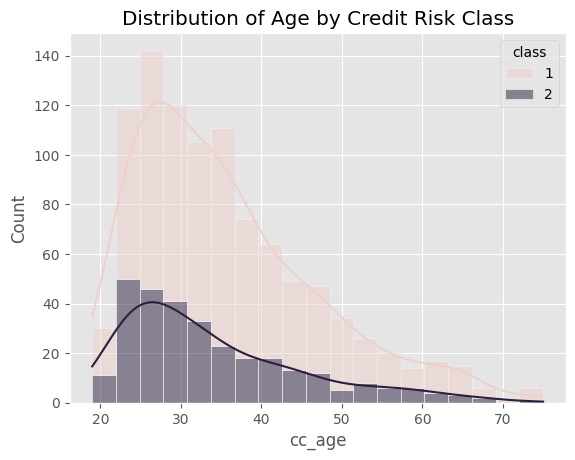

In [22]:
sns.histplot(data=data, x='cc_age', hue='class', multiple='stack', kde= 'true')
plt.title('Distribution of Age by Credit Risk Class')
plt.savefig('/content/drive/MyDrive/DoanML/anh3.png')
plt.show()

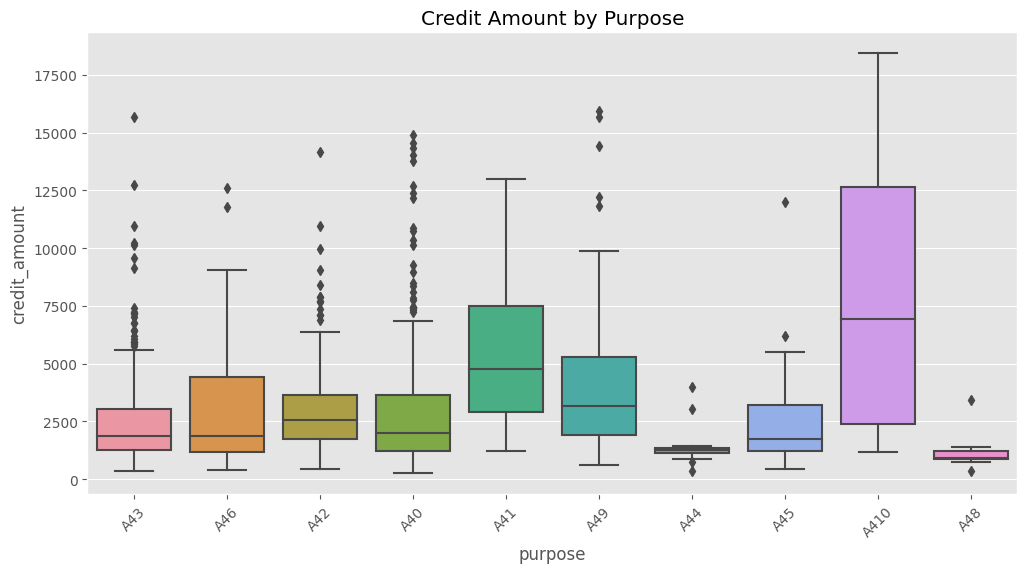

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='purpose', y='credit_amount')
plt.xticks(rotation=45)
plt.title('Credit Amount by Purpose')
plt.savefig('/content/drive/MyDrive/DoanML/anh4.png')
plt.show()

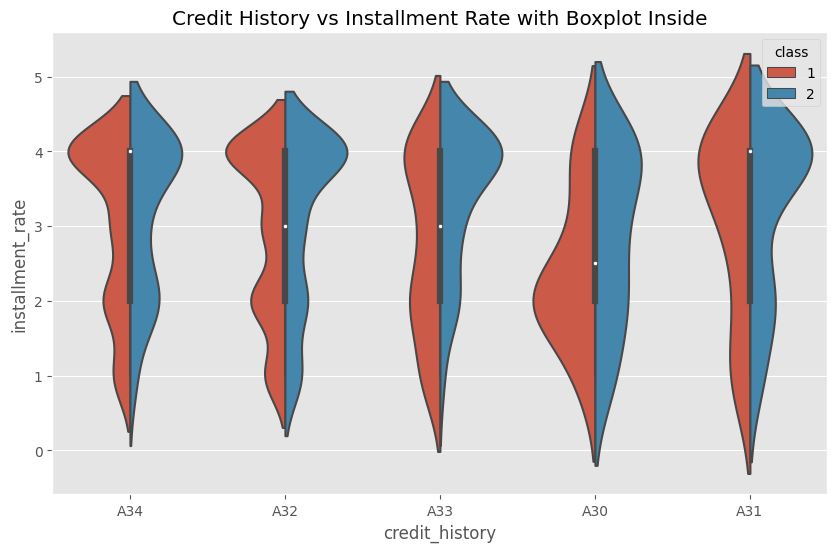

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='credit_history', y='installment_rate', hue='class', inner='box', split=True)
plt.title('Credit History vs Installment Rate with Boxplot Inside')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 43.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


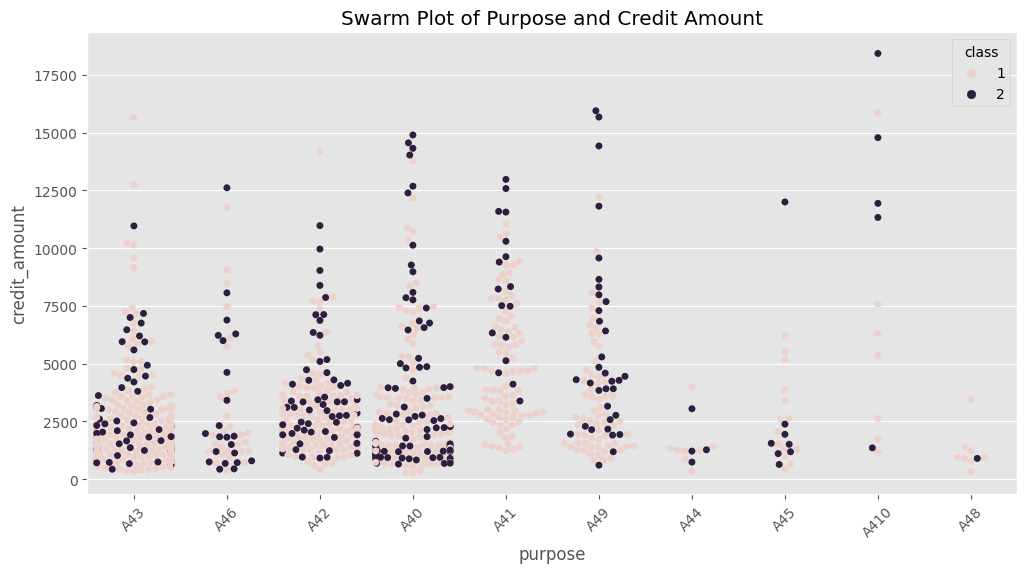

In [25]:
plt.figure(figsize=(12, 6))
sns.swarmplot(data=data, x='purpose', y='credit_amount', hue='class')
plt.xticks(rotation=45)
plt.title('Swarm Plot of Purpose and Credit Amount')
plt.show()

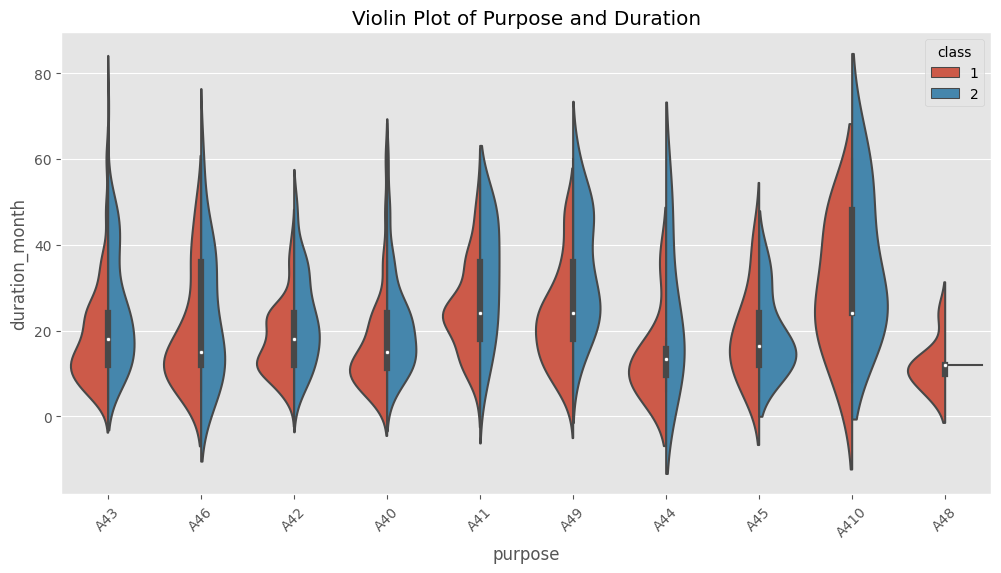

In [26]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='purpose', y='duration_month', hue='class', split=True)
plt.xticks(rotation=45)
plt.title('Violin Plot of Purpose and Duration')
plt.show()

<ipython-input-27-52bded6f3aa7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


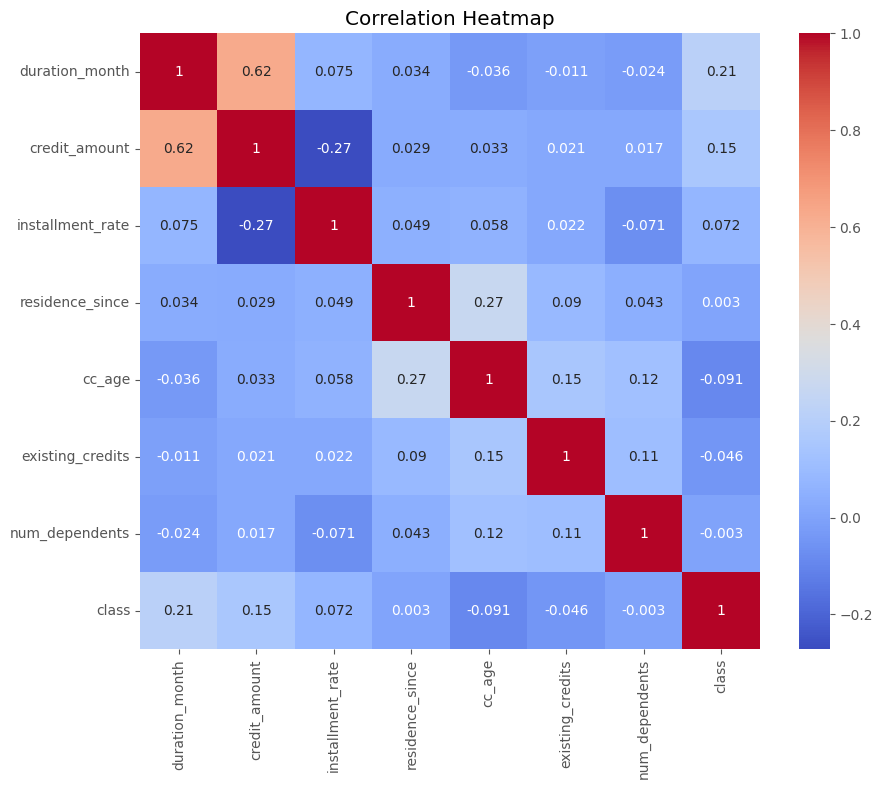

In [27]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig('/content/drive/MyDrive/DoanML/anh5.png')
plt.show()

In [28]:
category_label_columns = ['foreign_worker','own_telephone','num_dependents','class']
category_onehot_columns = ['existing_checking','credit_history','purpose','savings','employment','installment_rate','personal_status','other_parties','residence_since','property_magnitude', 'other_payment_plans', 'housing' ,'existing_credits' ,'job']

In [29]:
onehot_category = OneHotEncoder()
label_category = LabelEncoder()

category_cols = onehot_category.fit_transform(data[category_onehot_columns])
feature_names = onehot_category.get_feature_names_out(input_features=category_onehot_columns)
encoded_df = pd.DataFrame(category_cols.toarray(), columns=feature_names)

data = data.drop(columns=category_onehot_columns)

for col in category_label_columns:
    data[col] = label_category.fit_transform(data[col])

# Concatenate the DataFrames
data = pd.concat([data, encoded_df], axis=1)

In [30]:
data.head()

,duration_month,credit_amount,cc_age,num_dependents,own_telephone,foreign_worker,class,existing_checking_A11,existing_checking_A12,existing_checking_A13,...,housing_A152,housing_A153,existing_credits_1,existing_credits_2,existing_credits_3,existing_credits_4,job_A171,job_A172,job_A173,job_A174
0,6,1169,67,0,1,0,0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,48,5951,22,0,0,0,1,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12,2096,49,1,0,0,0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,42,7882,45,1,0,0,0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,24,4870,53,1,0,0,1,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
continue_encoded = ['duration_month',	'credit_amount',	'cc_age']

scaler = MinMaxScaler()
data[continue_encoded] = scaler.fit_transform(data[continue_encoded])

In [32]:
data[continue_encoded]

,duration_month,credit_amount,cc_age
0,0.029412,0.050567,0.857143
1,0.647059,0.313690,0.053571
2,0.117647,0.101574,0.535714
3,0.558824,0.419941,0.464286
4,0.294118,0.254209,0.607143
...,...,...,...
995,0.117647,0.081765,0.214286
996,0.382353,0.198470,0.375000
997,0.117647,0.030483,0.339286
998,0.602941,0.087763,0.071429


In [33]:
X = data.drop('class', axis = 'columns')
y = data['class']

In [34]:
y.value_counts()

0    700
1    300
Name: class, dtype: int64

In [35]:
smote = SMOTE()

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

y_resampled.value_counts()

0    700
1    700
Name: class, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled ,
                                                    random_state = 12, test_size = .2, stratify= y_resampled)

print(f'X training : {X_train.shape}')
print(f'y training : {y_train.shape}')
print(f'X testing : {X_test.shape}')
print(f'y testing : {y_test.shape}')

X training : (1120, 68)
y training : (1120,)
X testing : (280, 68)
y testing : (280,)


In [58]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [38]:
y_pred = svc_model.predict(X_test)
y_pred[:10]

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [39]:
y_test[:10].values

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1])

In [40]:
print(f'SVM : {accuracy_score(y_test, y_pred)}')

SVM : 0.8357142857142857


In [41]:
rp = classification_report(y_test,y_pred)
print(rp)

ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       140
           1       0.81      0.87      0.84       140

    accuracy                           0.84       280
   macro avg       0.84      0.84      0.84       280
weighted avg       0.84      0.84      0.84       280

ROC AUC : 0.8357


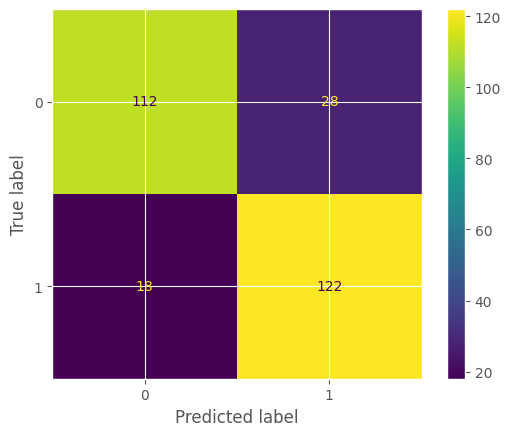

In [42]:
pred = svc_model.predict(X_test)
cm = confusion_matrix(y_test, pred, labels = svc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= svc_model.classes_)
disp.plot()
plt.savefig('/content/drive/MyDrive/DoanML/anh6.png')
plt.show()

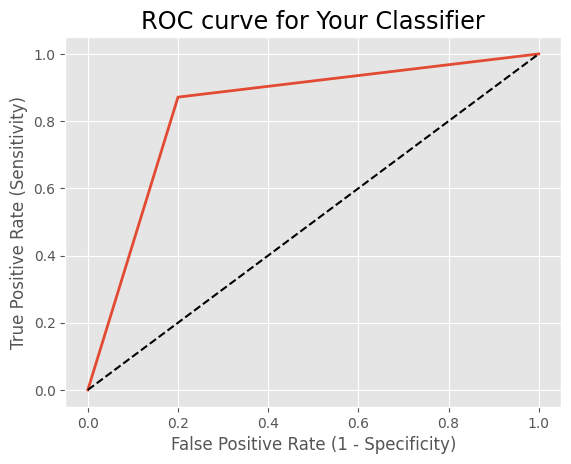

In [43]:
# Tính toán FPR, TPR và ngưỡng
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Vẽ đường cong ROC-AUC
plt.figure()
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Your Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.savefig('/content/drive/MyDrive/DoanML/anh7.png')
plt.show()

In [44]:
# Khởi tạo bộ phân loại với các siêu tham số mặc định, với kernel=rbf, C=1.0 và gamma=auto
svc = SVC()

# Khai báo các tham số cần tìm kiếm
parameters = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.01, 0.02, 0.03, 0.04, 0.05]},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
]

# Tạo GridSearchCV
grid_search = GridSearchCV(estimator=svc,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           verbose=0)

# Tiến hành tìm kiếm siêu tham số
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['sigmoid']}],
             scoring='accuracy')

In [45]:
# Xem xét mô hình tốt nhất

# Điểm số tốt nhất đạt được trong quá trình GridSearchCV
print('Điểm số tốt nhất từ GridSearch CV: {:.4f}\n\n'.format(grid_search.best_score_))

# In ra các tham số cho kết quả tốt nhất
print('Các tham số tạo ra kết quả tốt nhất:', '\n\n', grid_search.best_params_)

# In ra mô hình ước lượng được chọn bởi GridSearch
print('\n\nMô hình ước lượng được chọn bởi tìm kiếm:', '\n\n', grid_search.best_estimator_)

Điểm số tốt nhất từ GridSearch CV: 0.8714


Các tham số tạo ra kết quả tốt nhất: 

 {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}


Mô hình ước lượng được chọn bởi tìm kiếm: 

 SVC(C=10, gamma=0.5)


In [46]:
# Lấy thông tin kết quả tìm siêu tham số và tạo DataFrame
results = pd.DataFrame(grid_search.cv_results_)
results_df = results[['params', 'mean_test_score', 'std_test_score']]

# Hiển thị DataFrame kết quả
results_df

,params,mean_test_score,std_test_score
0,"{'C': 1, 'kernel': 'linear'}",0.768750,0.013061
1,"{'C': 10, 'kernel': 'linear'}",0.773214,0.017723
2,"{'C': 100, 'kernel': 'linear'}",0.771429,0.021015
3,"{'C': 1000, 'kernel': 'linear'}",0.771429,0.021015
4,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.826786,0.019845
...,...,...,...
131,"{'C': 1000, 'gamma': 0.5, 'kernel': 'sigmoid'}",0.578571,0.011504
132,"{'C': 1000, 'gamma': 0.6, 'kernel': 'sigmoid'}",0.542857,0.029424
133,"{'C': 1000, 'gamma': 0.7, 'kernel': 'sigmoid'}",0.546429,0.033834
134,"{'C': 1000, 'gamma': 0.8, 'kernel': 'sigmoid'}",0.535714,0.034233


In [47]:
results_df.sort_values(by = 'mean_test_score',ascending = False).head(3)

,params,mean_test_score,std_test_score
26,"{'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}",0.871429,0.022833
35,"{'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}",0.871429,0.022833
17,"{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}",0.871429,0.022833


In [48]:
results_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_test_score,136.0,0.750256,0.111980,0.519643,0.653348,0.796429,0.829688,0.871429
std_test_score,136.0,0.023003,0.009181,0.006056,0.016318,0.021129,0.028536,0.058029


In [49]:
# Tạo mô hình SVC với siêu tham số đã tìm được
best_params = grid_search.best_params_
svc_model = SVC(**best_params)
# Huấn luyện mô hình trên tập huấn luyện
svc_model.fit(X_train, y_train)

SVC(C=10, gamma=0.5)

In [50]:
y_pred = svc_model.predict(X_test)
y_pred[:10]

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1])

In [51]:
y_test[:10].values

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1])

In [52]:
print(f'SVM : {accuracy_score(y_test, y_pred)}')

SVM : 0.9107142857142857


In [53]:
rp = classification_report(y_test,y_pred)
print(rp)

ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92       140
           1       0.96      0.86      0.91       140

    accuracy                           0.91       280
   macro avg       0.92      0.91      0.91       280
weighted avg       0.92      0.91      0.91       280

ROC AUC : 0.9107


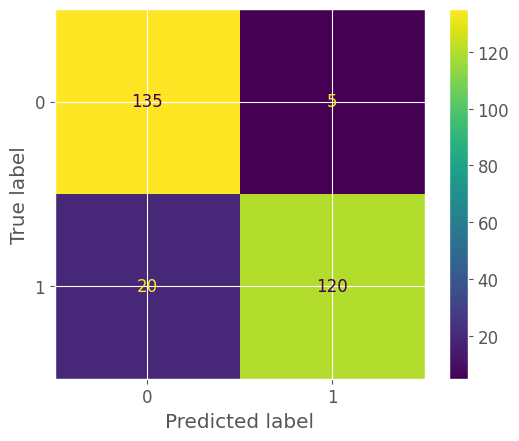

In [54]:
pred = svc_model.predict(X_test)
cm = confusion_matrix(y_test, pred, labels = svc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= svc_model.classes_)
disp.plot()
plt.savefig('/content/drive/MyDrive/DoanML/anh8.png')
plt.show()

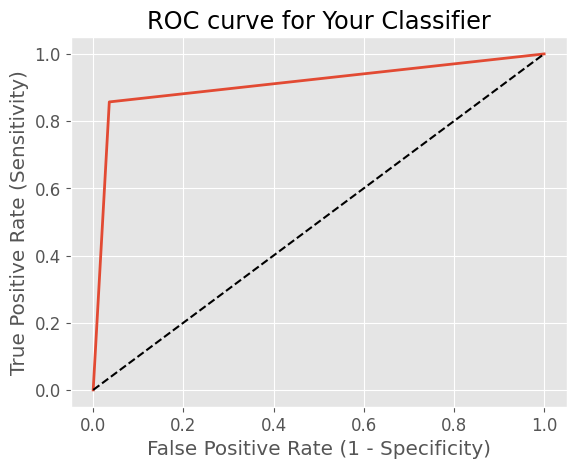

In [55]:
# Tính toán FPR, TPR và ngưỡng
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Vẽ đường cong ROC-AUC
plt.figure()
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Your Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.savefig('/content/drive/MyDrive/DoanML/anh9.png')
plt.show()